# Load data

In [1]:
import data
import plot


data_bin, words = data.load_vectors("binvectors256.vec", n_words=50)

# Cluster using ART1

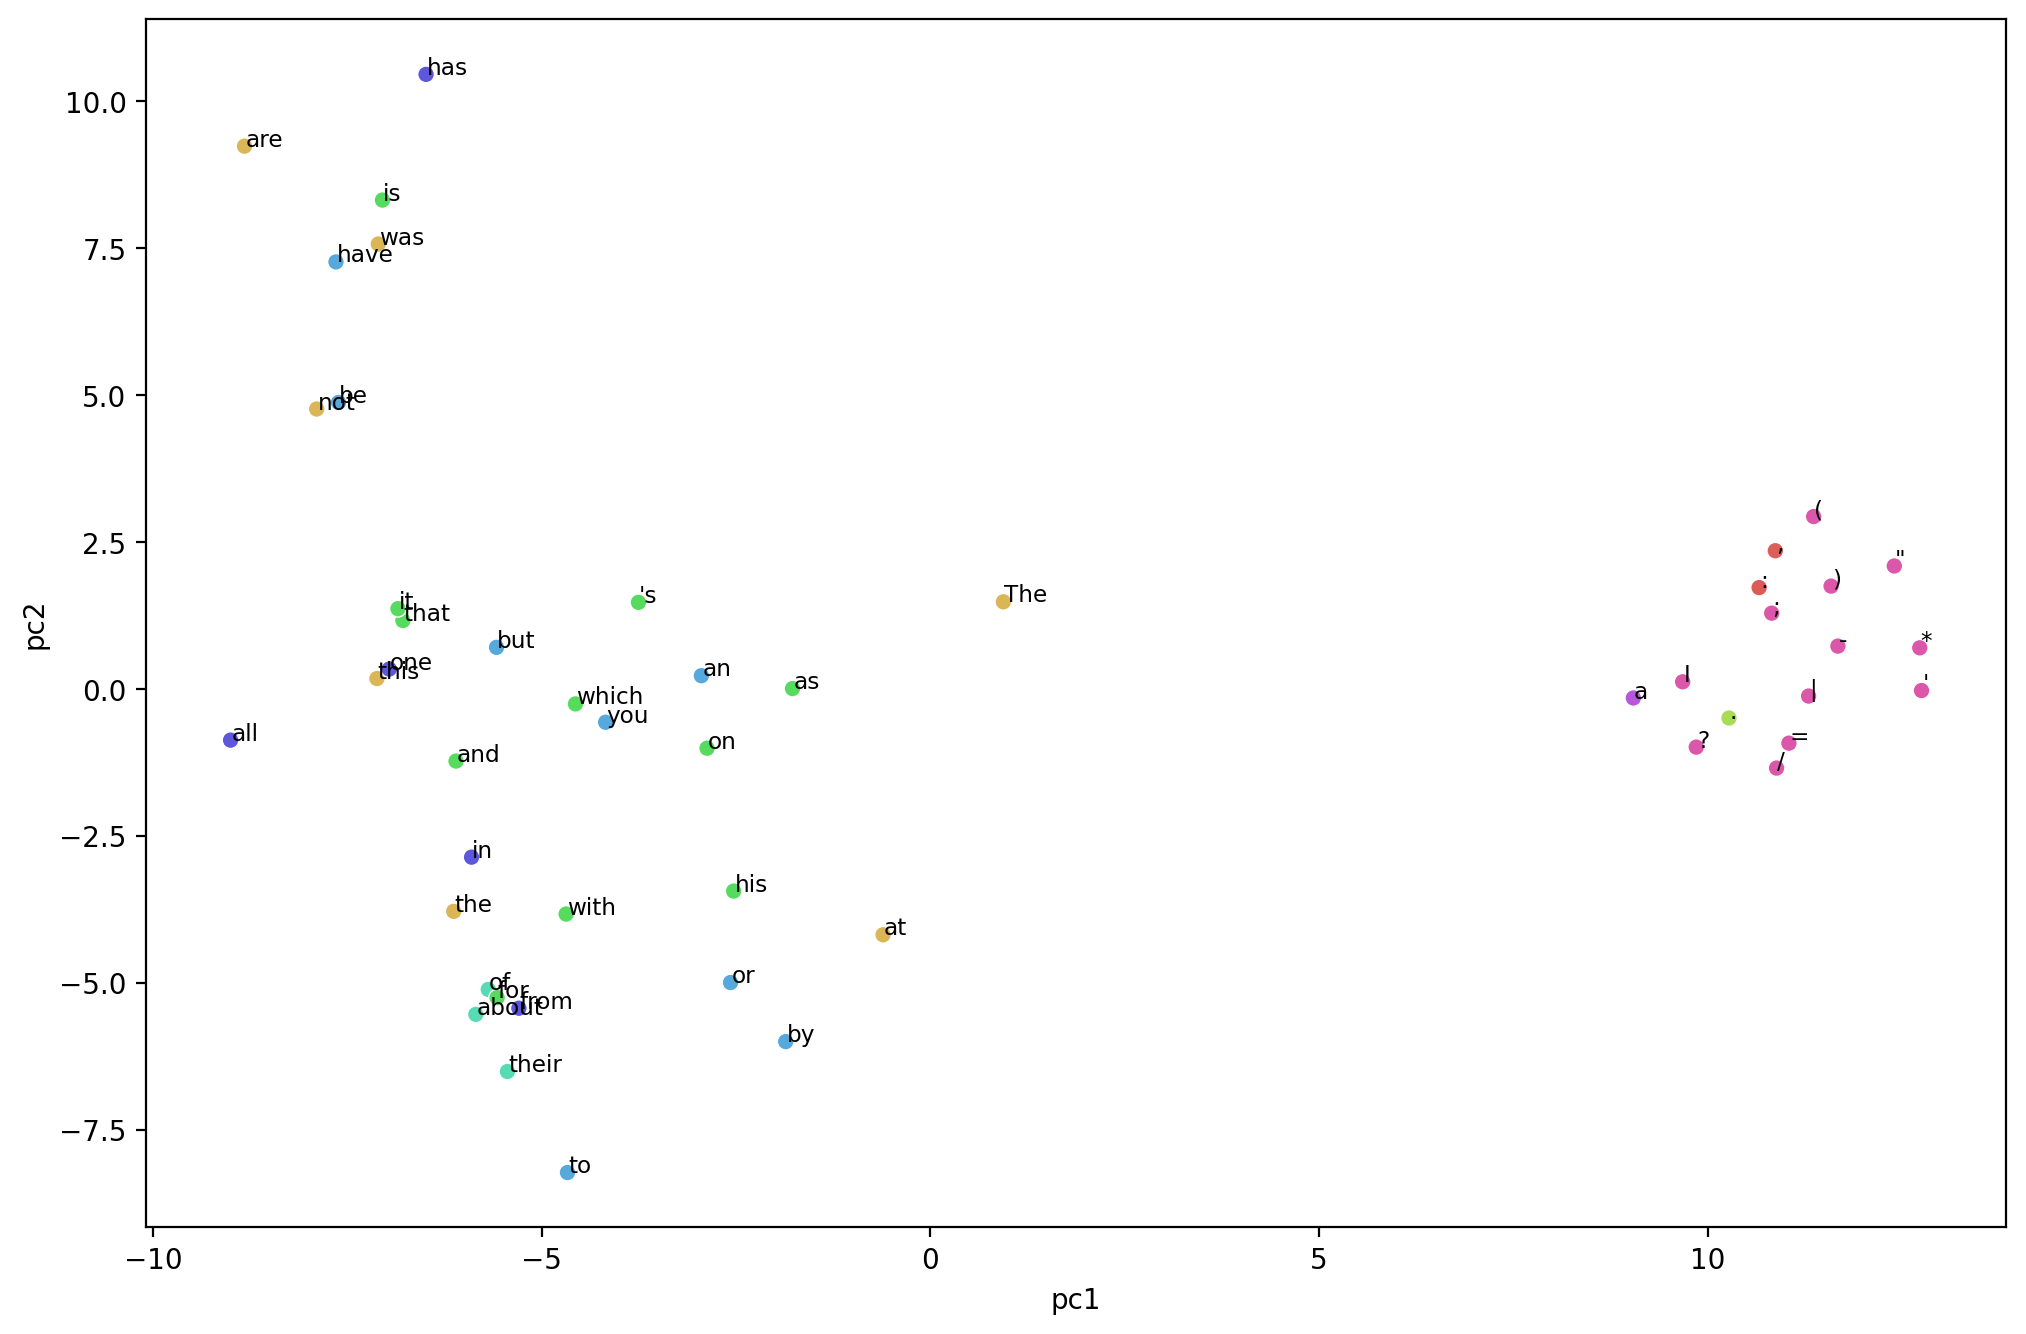

In [3]:
from neupy import algorithms

artnet = algorithms.ART1(
        step=0.1,
        rho=0.1,
        n_clusters=10,
        shuffle_data=False
    )
clusters_art = artnet.predict(data_bin)
plot.plot(data_bin, words, clusters_art)

# Cluster using K-means

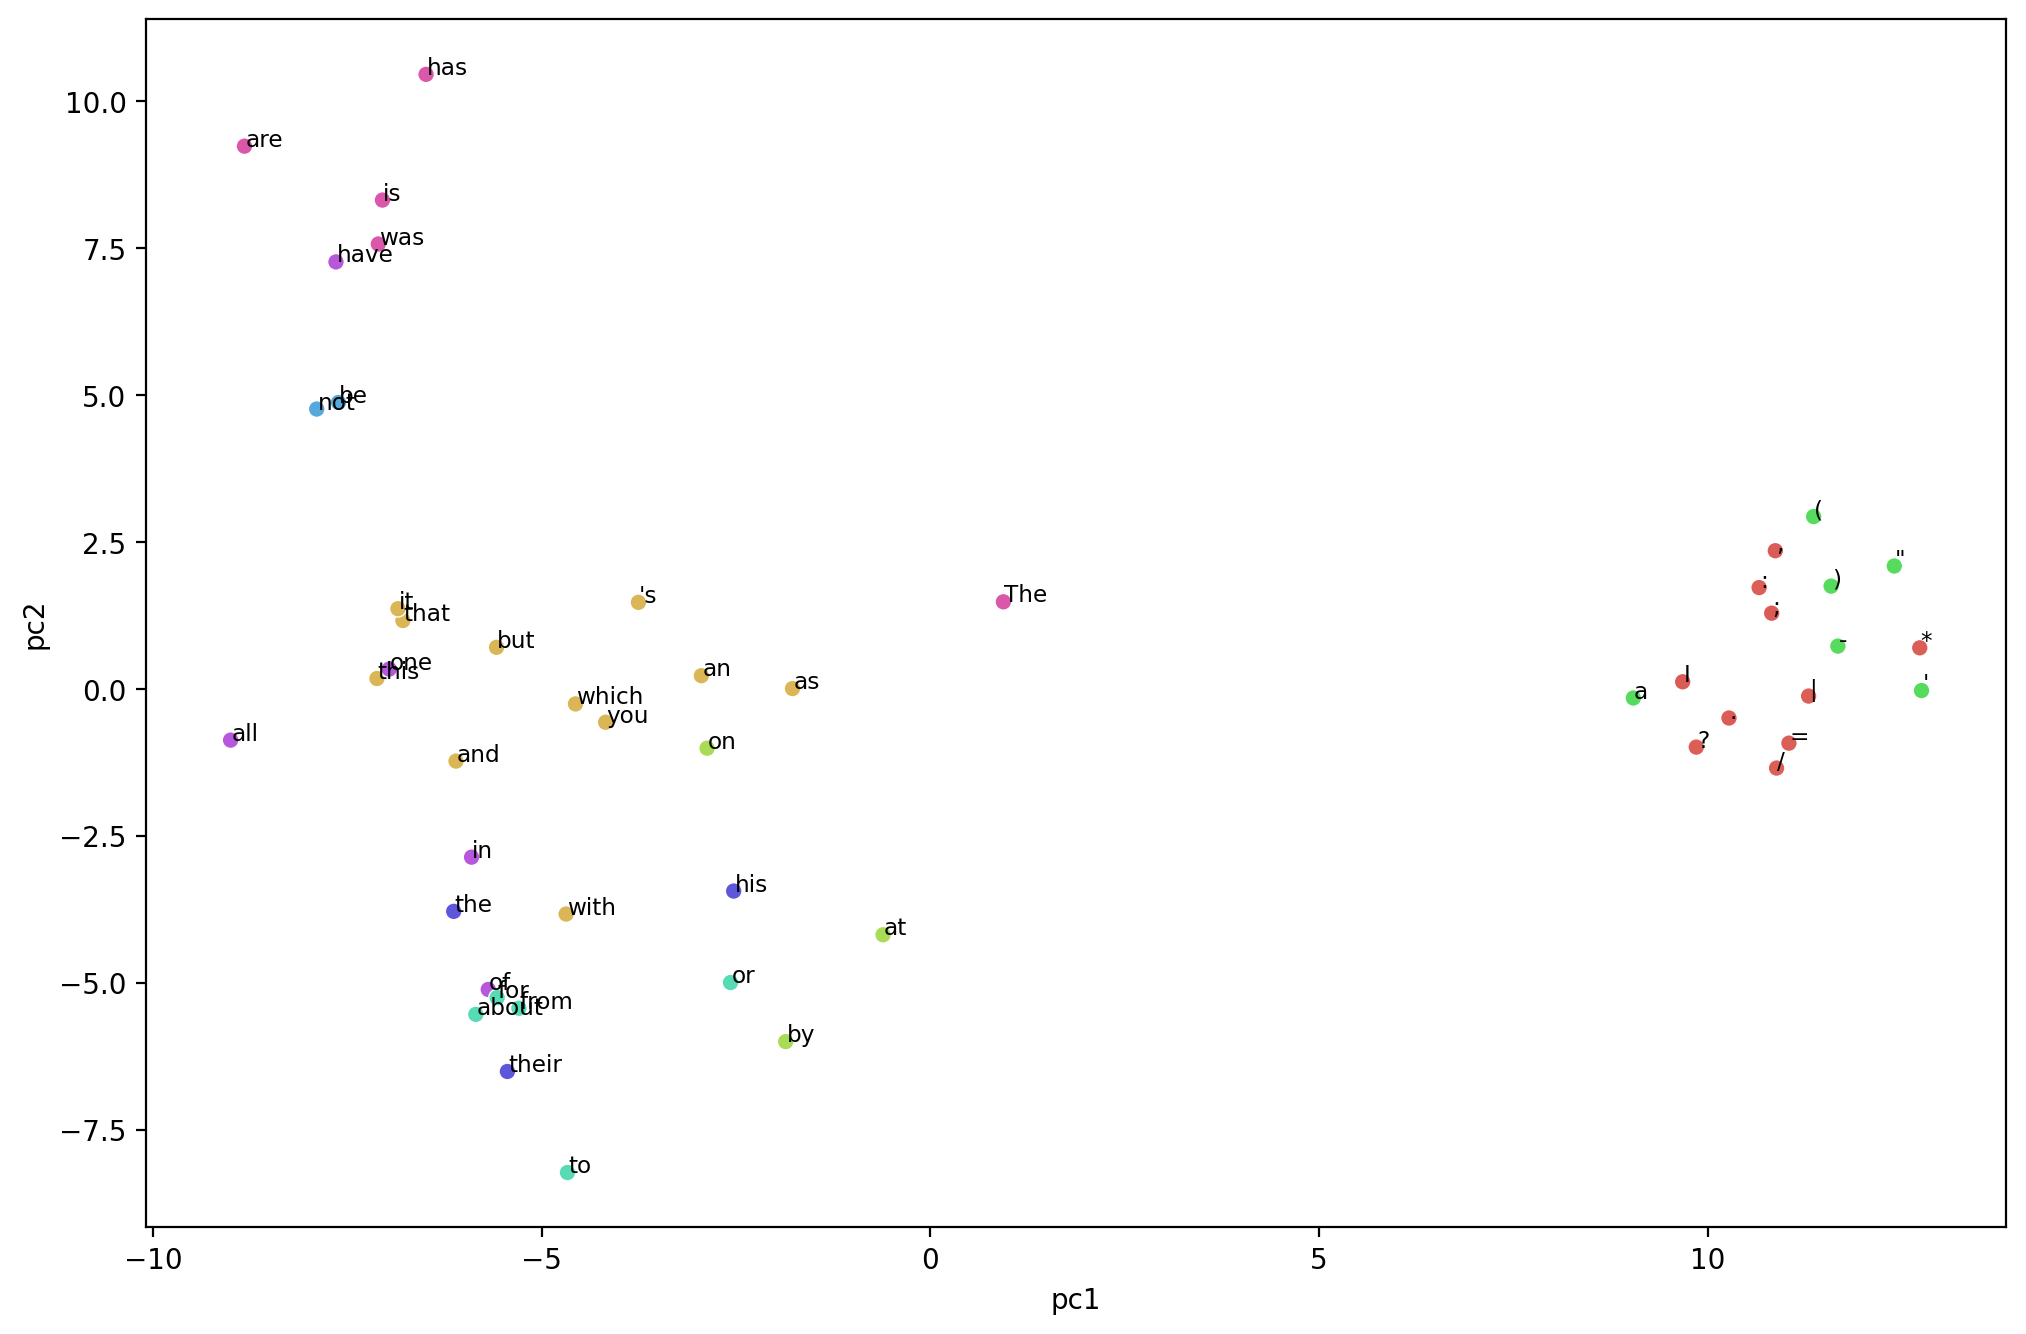

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
clusters_kmean = kmeans.fit_predict(data_bin)
plot.plot(data_bin, words, clusters_kmean)